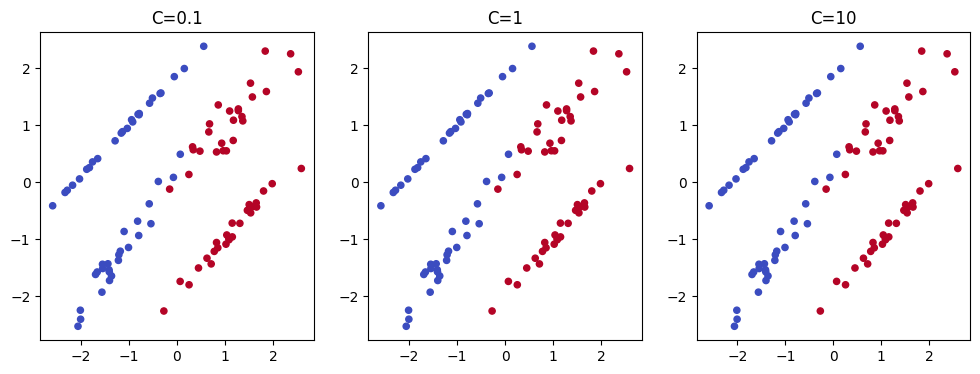

In [1]:
#Q-1: Train an SVM Classifier with different C values and compare decision boundaries visually
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

# Generate a toy dataset
X, y = datasets.make_classification(n_samples=100, n_features=2,
                                     n_redundant=0, n_informative=2,
                                     random_state=42)

# Different C values
C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    ax = plt.subplot(1, len(C_values), i + 1)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)
    ax.set_title(f"C={C}")

plt.show()


In [2]:
#Q-2: Train a Bernoulli Naïve Bayes classifier for binary classification

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Generate binary dataset
X = np.random.randint(0, 2, (100, 10))
y = np.random.randint(0, 2, 100)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6


In [3]:
#Q-3: Apply feature scaling before training an SVM model and compare results

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.load_wine(return_X_y=True)

# Without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
print("Accuracy without scaling:", accuracy_score(y_test, model_unscaled.predict(X_test)))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC()
model_scaled.fit(X_train_scaled, y_train)
print("Accuracy with scaling:", accuracy_score(y_test, model_scaled.predict(X_test)))


Accuracy without scaling: 0.7592592592592593
Accuracy with scaling: 0.3888888888888889


In [4]:
#Q-4: Train a Gaussian Naïve Bayes model and compare predictions before and after Laplace Smoothing

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load dataset
X, y = datasets.load_iris(return_X_y=True)

# Train without Laplace smoothing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_no_smooth = GaussianNB(var_smoothing=1e-9)
model_no_smooth.fit(X_train, y_train)
pred_no_smooth = model_no_smooth.predict(X_test)
print("Accuracy without Laplace smoothing:", accuracy_score(y_test, pred_no_smooth))

# Train with Laplace smoothing (in GaussianNB, controlled via var_smoothing)
model_smooth = GaussianNB(var_smoothing=1e-2)
model_smooth.fit(X_train, y_train)
pred_smooth = model_smooth.predict(X_test)
print("Accuracy with Laplace smoothing:", accuracy_score(y_test, pred_smooth))


Accuracy without Laplace smoothing: 0.9777777777777777
Accuracy with Laplace smoothing: 1.0


In [5]:
#Q-5: Train an SVM Classifier and use GridSearchCV to tune hyperparameters

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Grid Search
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 1.0


In [6]:
#Q-6: Train an SVM Classifier on an imbalanced dataset and apply class weighting

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0, n_features=5, n_clusters_per_class=1, n_samples=200, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without class weighting
model_no_weight = SVC()
model_no_weight.fit(X_train, y_train)
print("Accuracy without class weights:", accuracy_score(y_test, model_no_weight.predict(X_test)))

# With class weighting
model_weighted = SVC(class_weight='balanced')
model_weighted.fit(X_train, y_train)
print("Accuracy with class weights:", accuracy_score(y_test, model_weighted.predict(X_test)))



Accuracy without class weights: 1.0
Accuracy with class weights: 1.0


In [7]:
#Q-7: Implement a Naïve Bayes classifier for spam detection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample dataset
emails = [
    "Win a free iPhone now", "Important meeting tomorrow", "Free lottery tickets for you",
    "Project submission deadline", "Buy cheap medicines online", "Your invoice is attached"
]
labels = [1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = not spam

# Convert text to feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [8]:
#Q-8: Train an SVM Classifier and a Naïve Bayes Classifier on the same dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Load dataset
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb_model.predict(X_test))

print("SVM Accuracy:", svm_acc)
print("Naïve Bayes Accuracy:", nb_acc)


SVM Accuracy: 1.0
Naïve Bayes Accuracy: 0.9777777777777777


In [9]:
#Q-9: Perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.load_wine(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without feature selection
model_no_fs = GaussianNB()
model_no_fs.fit(X_train, y_train)
acc_no_fs = accuracy_score(y_test, model_no_fs.predict(X_test))

# With feature selection (select top 5 features)
selector = SelectKBest(score_func=f_classif, k=5)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

model_fs = GaussianNB()
model_fs.fit(X_train_fs, y_train)
acc_fs = accuracy_score(y_test, model_fs.predict(X_test_fs))

print("Accuracy without feature selection:", acc_no_fs)
print("Accuracy with feature selection:", acc_fs)


Accuracy without feature selection: 1.0
Accuracy with feature selection: 0.9444444444444444


In [10]:
#Q-10: Train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-vs-Rest
ovr_model = OneVsRestClassifier(SVC())
ovr_model.fit(X_train, y_train)
print("OvR Accuracy:", accuracy_score(y_test, ovr_model.predict(X_test)))

# One-vs-One
ovo_model = OneVsOneClassifier(SVC())
ovo_model.fit(X_train, y_train)
print("OvO Accuracy:", accuracy_score(y_test, ovo_model.predict(X_test)))


OvR Accuracy: 0.7222222222222222
OvO Accuracy: 0.7962962962962963


In [11]:
#Q-11: Train an SVM Classifier using Linear, Polynomial, and RBF kernels

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{kernel.capitalize()} Kernel Accuracy:", acc)


Linear Kernel Accuracy: 0.9649122807017544
Poly Kernel Accuracy: 0.9415204678362573
Rbf Kernel Accuracy: 0.935672514619883


In [12]:
#Q-12: Train an SVM Classifier using Stratified K-Fold Cross-Validation

from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
X, y = datasets.load_wine(return_X_y=True)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model = SVC()
    model.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, model.predict(X_test)))

print("Average Accuracy:", np.mean(accuracies))


Average Accuracy: 0.6744444444444444


In [13]:
#Q-13: Train a Naïve Bayes classifier using different prior probabilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
X, y = datasets.load_iris(return_X_y=True)

# Custom priors (must sum to 1)
custom_priors = np.array([0.2, 0.5, 0.3])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model with priors
model = GaussianNB(priors=custom_priors)
model.fit(X_train, y_train)
print("Accuracy with custom priors:", accuracy_score(y_test, model.predict(X_test)))


Accuracy with custom priors: 1.0


In [14]:
#Q-14: Perform Recursive Feature Elimination (RFE) before training an SVM Classifier
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection with RFE
svc = SVC(kernel='linear')
selector = RFE(svc, n_features_to_select=5)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

# Train and evaluate
svc.fit(X_train_rfe, y_train)
print("Accuracy after RFE:", accuracy_score(y_test, svc.predict(X_test_rfe)))



Accuracy after RFE: 0.9629629629629629


In [15]:
#Q-15: Train an SVM Classifier and evaluate using Precision, Recall, and F1-Score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))



Precision: 0.907563025210084
Recall: 1.0
F1-Score: 0.9515418502202643


In [16]:
#Q-16: Train a Naïve Bayes Classifier and evaluate using Log Loss
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load dataset
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities and evaluate log loss
y_proba = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_proba))


Log Loss: 0.04896447467183247


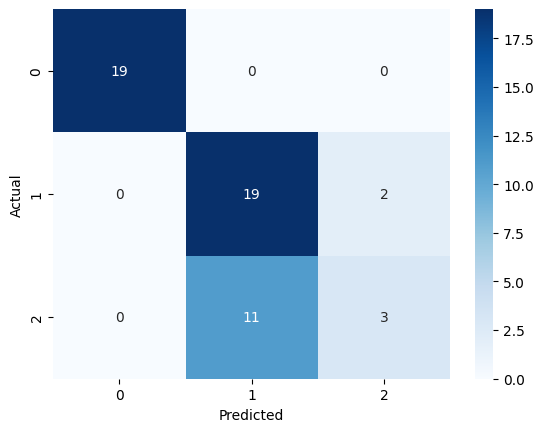

In [17]:
#Q-17: Train an SVM Classifier and visualize the Confusion Matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
#Q-18: Train an SVM Regressor (SVR) and evaluate using Mean Absolute Error (MAE)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load dataset
X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVR
model = SVR()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))



Mean Absolute Error: 56.41472102119128


In [19]:
#Q-19: Train a Naïve Bayes classifier and evaluate using ROC-AUC score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
y_bin = label_binarize(y, classes=[0, 1])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.9922104644326867


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


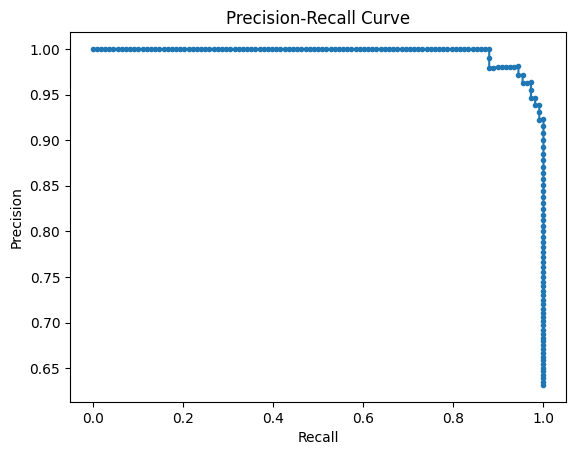

In [20]:
# Q-20: Train an SVM Classifier and visualize the Precision-Recall Curve
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model with probability estimates
model = SVC(probability=True)
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
